* Note: These codes are partly adapted from TensorFlow Tutorial of Stanford cs224d course 
    https://cs224d.stanford.edu/lectures/CS224d-Lecture7.pdf

Ex3. This is a simple exercise on linear regression in TensorFlow. Follow the instructions, and fill out the codes.

In [1]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

Overview

In [2]:
_x = np.arange(0, 100, .1)

In [3]:
np.random.shuffle(_x)
_x[:100]

array([ 77.9,  51.4,  59.8,   2.1,  19.3,  81.8,  83.7,  30.6,   4.4,
        67.5,  40.8,  25.4,   1.5,   5.7,  42.5,  64.4,  21.2,  12.3,
        60.6,  31.6,  49.6,  89.2,  50.4,  99.5,  12.2,  71.8,  92.5,
        53.5,  18.6,  73.6,  13.8,  54.1,  92.9,  68.1,  79.1,  22.1,
        30.4,  23.4,  75.7,  79.7,  86. ,  98.4,  86.7,   5.9,  73.2,
         7.1,  30. ,  67.3,   3.6,  22.8,  53.4,  85.1,  53. ,  97.2,
        44.8,  18. ,  26.6,  80.2,  52.3,  13.1,  46.3,  26.2,  84.3,
        16.2,  54.4,   5.6,  18.3,  56.8,  80.7,  44.4,  29.1,  91.4,
        15.5,   9.8,  79.9,  67.6,  95.6,  93.5,  82.8,  42.2,  70.4,
        63.5,  78.7,  94.6,  55.5,  51.1,  19.8,  22.5,  38.4,  36.8,
        38.1,  44. ,  96.4,  93.6,  32.5,   6.8,  63.3,  37.3,  88.1,  41.2])

In [4]:
_y = _x + 20*np.sin(_x*.1)

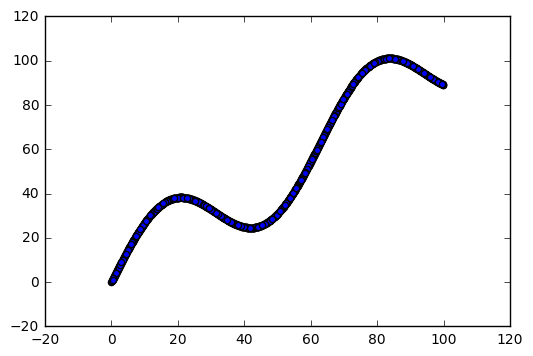

In [5]:
plt.scatter(_x, _y)

Build a graph

In [6]:
# Inputs, Outputs
x_pl = tf.placeholder(tf.float32, [None, 1]) # 2-D
y_pl = tf.placeholder(tf.float32, [None, 1]) # 2-D

In [7]:
# Variables
W = tf.Variable(tf.random_normal([1, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

In [8]:
# Hypothesis
h = tf.matmul(x_pl, W) + b # (None, 1)

In [9]:
h

<tf.Tensor 'add:0' shape=(?, 1) dtype=float32>

In [10]:
# loss
loss = tf.reduce_mean(tf.square(y_pl - h))

In [11]:
# Optimization
optimizer = tf.train.AdamOptimizer()
train_op = optimizer.minimize(loss)

In [12]:
# Init
init = tf.global_variables_initializer()

In [13]:
# Summary
writer = tf.summary.FileWriter('asset', tf.get_default_graph())
tf.summary.scalar("loss", loss)
tf.summary.scalar("W", W[0, 0])
tf.summary.scalar("b", b[0])
summaries = tf.summary.merge_all()

Launch the graph

In [14]:
# Start a session
sess = tf.Session()

# Initialize all variables
sess.run(tf.global_variables_initializer())

In [15]:
def get_samples(x, y, size):
    assert len(x) == len(y), "Two arrays must be the same in length!"
    indices = np.random.choice(len(x), size)
    sample1 = x[indices]
    sample2 = y[indices]
    return np.expand_dims(sample1,1), np.expand_dims(sample2, 1)
    

In [16]:
loss_list = []
for i in range(1, 2001):
    x_batch, y_batch = get_samples(_x, _y, 100)
    sess.run(train_op, {x_pl:x_batch, y_pl:y_batch})
    _loss, _s = sess.run([loss, summaries], {x_pl:x_batch, y_pl:y_batch})
    writer.add_summary(_s)
    loss_list.append(_loss)
    

In [17]:
_w, _b = sess.run([W, b])

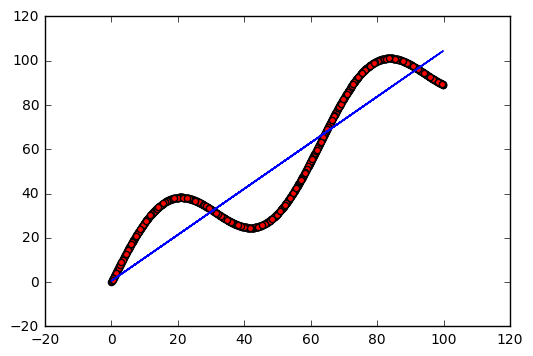

In [19]:
plt.scatter(_x, _y, c="r")
plt.plot(_x, _x * _w[0, 0] + _b[0])